In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import dataset

def plot(b):
    plt.plot(b.data['unixtime'], b.data['result'])
    plt.show()

def main():
    print('start: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

    
    csv = pd.read_csv("datasets/candlestick.csv")
    #csv = csv[-5000:]
    b = dataset.BitcoinDataset()
    b.set_dataset(csv)
    b.data.to_csv("datasets/train_v4.csv")
    
    
    print('end: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()

start: 2020/05/04 19:21:27


KeyboardInterrupt: 

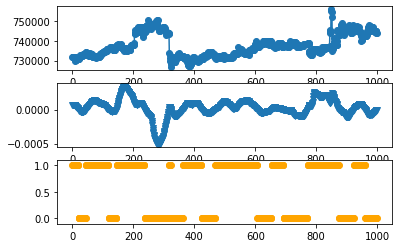

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("datasets/train_v3.csv")
data = csv[-1000:]
x = list(range(len(data)))
y_close = list(data['close'])
y_result = list(data['result'])
trend = [i > 0 for i in y_result]

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(x, y_close, marker="o")
ax2.plot(x, y_result, marker="v")
ax3.scatter(x, trend, marker="o", color='orange')
plt.show()

In [8]:
from scipy.stats import linregress
minutes_of_hours = 60 * 1
index = 0#427000

csv = pd.read_csv("datasets/train_v3.csv")
last_index = index + minutes_of_hours
data_in_hours = csv[index:last_index]

#x = data_in_hours['unixtime']
x = list(range(len(data_in_hours['unixtime'])))
y = list(data_in_hours['close'])
print(y[0])

trend_line = linregress(x=x, y=y)
print(trend_line[0])
print(round(trend_line[0] / y[0], 1))

673795
-39.12425673798277
-0.0
